In [3]:
#pip install pycountry_convert

In [4]:
import warnings
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from scipy import stats
#from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None 

In [5]:
life_expectancy_data = pd.read_csv("Life Expectancy Data.csv")
life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
print("Countries with Highest Life Expectancy")
country_vs_life = life_expectancy_data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by = 'Life expectancy ', ascending=False).head(10)

Countries with Highest Life Expectancy


,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [7]:
print("Countries with Lowest Life Expectancy")
country_vs_life.sort_values(by = 'Life expectancy ', ascending = True).head(10)
country_vs_life.head(10)

Countries with Lowest Life Expectancy


,Country,Life expectancy
0,Afghanistan,58.19375
1,Albania,75.15625
2,Algeria,73.61875
3,Angola,49.01875
4,Antigua and Barbuda,75.05625
5,Argentina,75.15625
6,Armenia,73.40000
7,Australia,81.81250
8,Austria,81.48125
9,Azerbaijan,70.73125


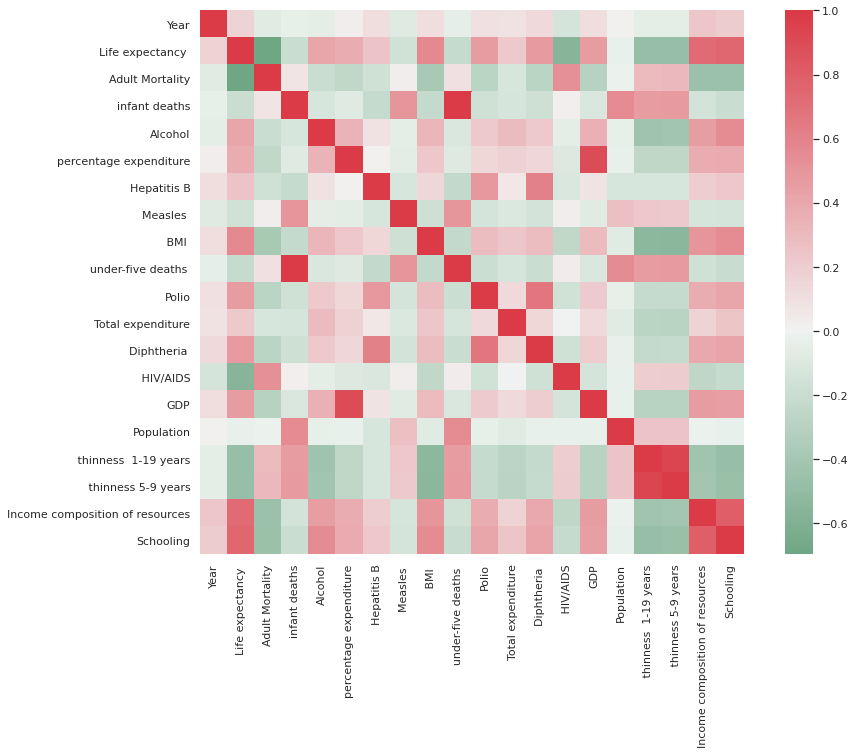

In [8]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(life_expectancy_data.corr(), cmap =cmap, center=0, annot=False, square=True);

Life expectancy and diseases are negatively correlated for heatmap.
Income and schooling has strongly positive correlation with life expectancy.
Other positive correlations: vaccines of Hepatitis B, Polio, and Diphtheria.
Other negative correlations : Infant and adult mortality

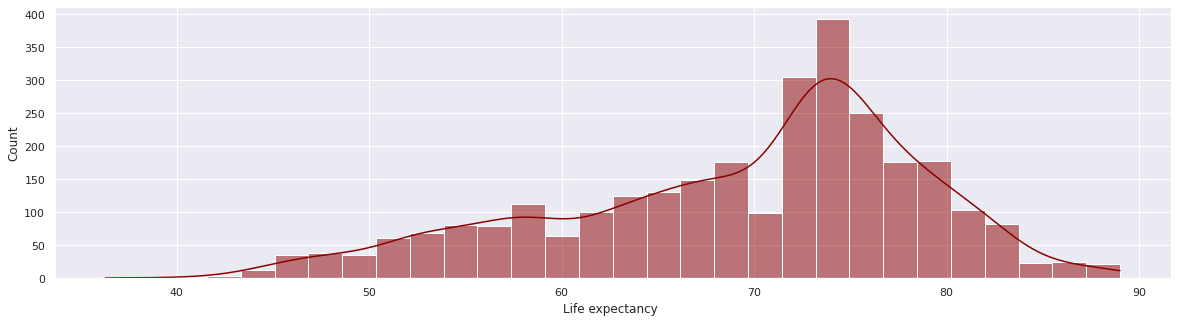

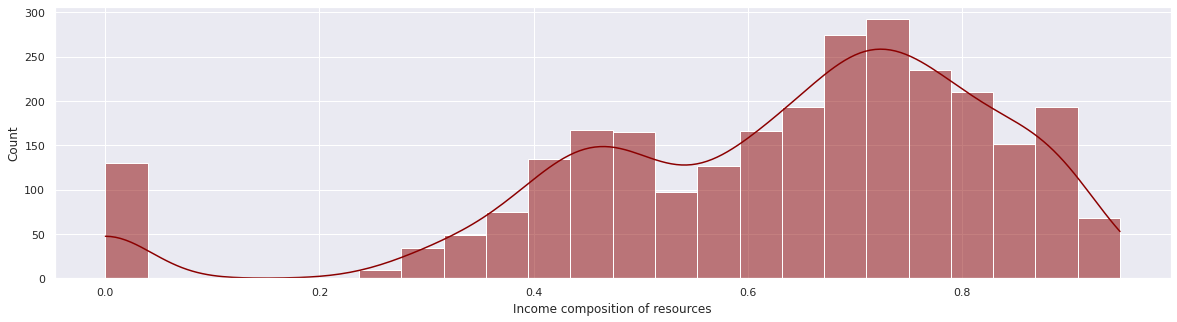

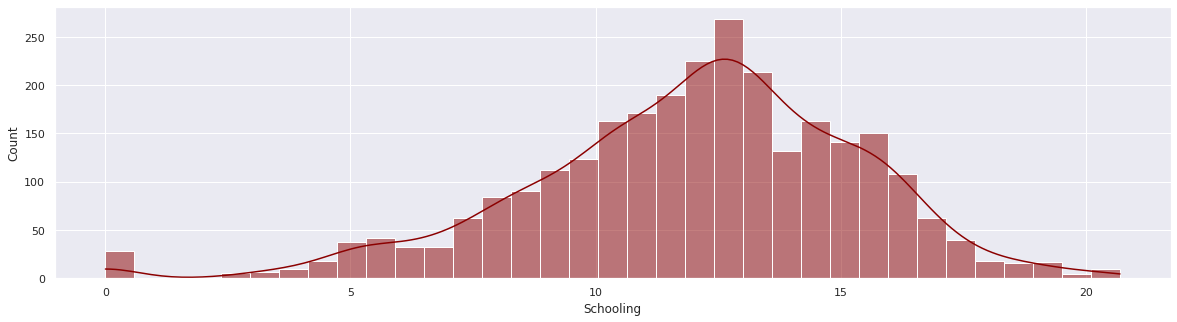

In [9]:
l= [life_expectancy_data['Life expectancy '].dropna(), life_expectancy_data['Income composition of resources'].dropna(), life_expectancy_data['Schooling'].dropna()]
for i in l:
    plt.figure(figsize=(20,5))
    sns.histplot(i, kde=True, color="darkred")

Life expectncy has a dense distribution between 70 - 76 years.

In [10]:
life_expectancy_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

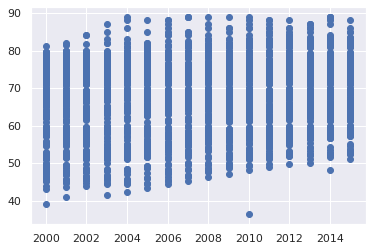

In [11]:
plt.scatter(life_expectancy_data["Year"],life_expectancy_data["Life expectancy "])

Over the year, life expectancy has been increased slightly.

Text(0, 0.5, 'BMI')

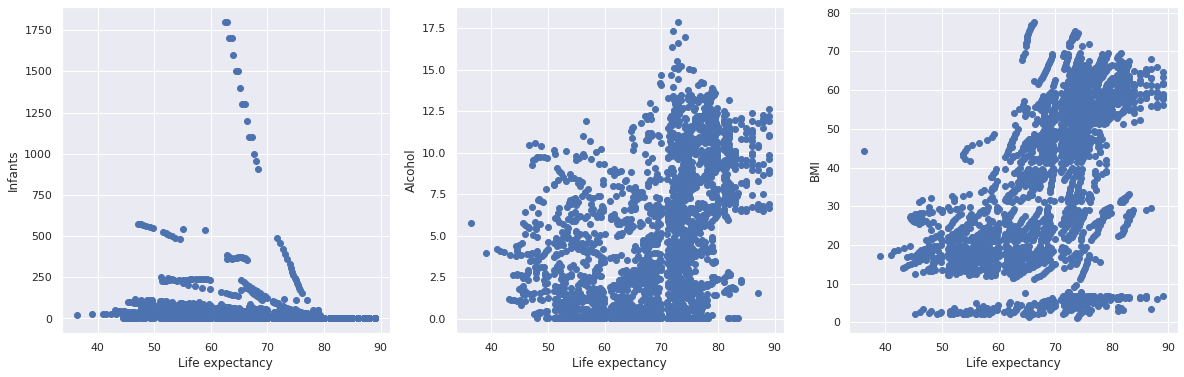

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(life_expectancy_data["Life expectancy "], life_expectancy_data["infant deaths"])
plt.xlabel("Life expectancy")
plt.ylabel("Infants")
plt.subplot(1,3,2)
plt.scatter(life_expectancy_data["Life expectancy "], life_expectancy_data["Alcohol"])
plt.xlabel("Life expectancy")
plt.ylabel("Alcohol")
plt.subplot(1,3,3)
plt.scatter(life_expectancy_data["Life expectancy "], life_expectancy_data[" BMI "])
plt.xlabel("Life expectancy")
plt.ylabel("BMI")

For figures,

Life expectancy decreases with increase in infant's death.
Countries with high alchol consumption has high life expectancy.
BMI and life expectancy has a linear relationship.

Text(0, 0.5, 'Income')

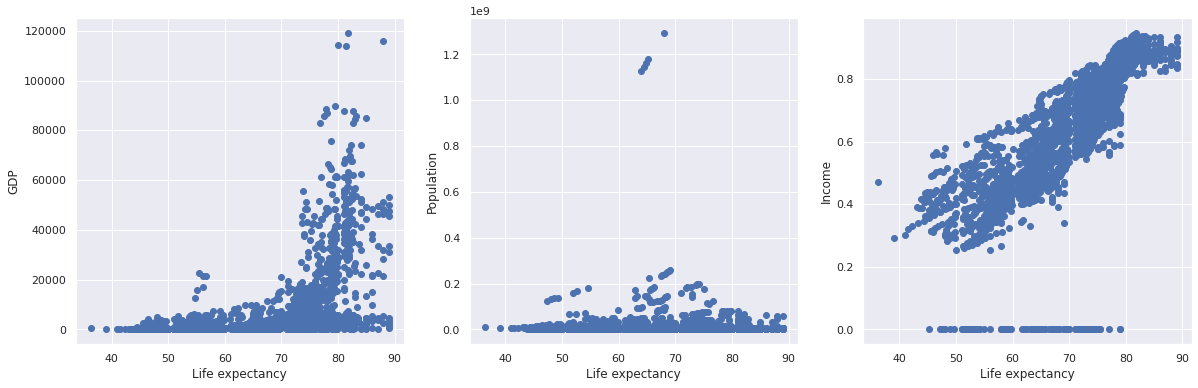

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(life_expectancy_data["Life expectancy "], life_expectancy_data["GDP"])
plt.xlabel("Life expectancy")
plt.ylabel("GDP")
plt.subplot(1,3,2)
plt.scatter(life_expectancy_data["Life expectancy "], life_expectancy_data["Population"])
plt.xlabel("Life expectancy")
plt.ylabel("Population")
plt.subplot(1,3,3)
plt.scatter(life_expectancy_data["Life expectancy "], life_expectancy_data["Income composition of resources"])
plt.xlabel("Life expectancy")
plt.ylabel("Income")

GDP and Life expectancy has a strong linear relationship.
Countries with high population has slightly low life expectancy.
As total income composition of a country increases, life expectancy also increases. (If you're rich, you're expected to live a long life)

# Missing Values

In [14]:
life_expectancy_data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
life_expectancy_data.columns = ['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness 1-19 years', 'thinness 5-9 years',
       'income_composition_of_resources', 'schooling']

**Filling the life expectancy and adult mortality with the mean values as it has a very less number of missing values**

In [16]:
life_expectancy_data["life_expectancy"] = life_expectancy_data["life_expectancy"].fillna(value = life_expectancy_data["life_expectancy"].mean())
life_expectancy_data["adult_mortality"] = life_expectancy_data["adult_mortality"].fillna(value = life_expectancy_data["adult_mortality"].mean())
life_expectancy_data.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [17]:
life_expectancy_data["alcohol"] = life_expectancy_data["alcohol"].groupby(life_expectancy_data["status"]).fillna(value = life_expectancy_data["alcohol"].mean())


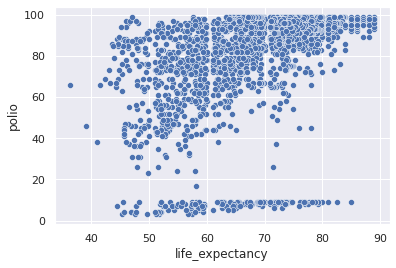

In [18]:
sns.scatterplot(x=life_expectancy_data['life_expectancy'],y=life_expectancy_data['polio']);

In [19]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
life_expectancy_data['polio']=life_expectancy_data[['polio','life_expectancy']].apply(impute_polio,axis=1)


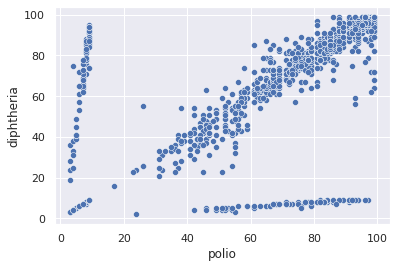

In [20]:
sns.scatterplot(x=life_expectancy_data['polio'],y=life_expectancy_data['diphtheria']);

In [21]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
life_expectancy_data['diphtheria']=life_expectancy_data[['diphtheria','polio']].apply(impute_Diptheria,axis=1)

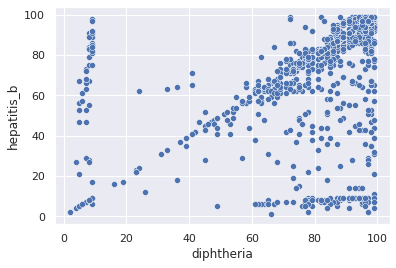

In [22]:
sns.scatterplot(x=life_expectancy_data['diphtheria'],y=life_expectancy_data['hepatitis_b']);

In [23]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
life_expectancy_data['hepatitis_b']=life_expectancy_data[['hepatitis_b','diphtheria']].apply(impute_HepatatisB,axis=1)

In [24]:
life_expectancy_data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                              0
percentage_expenditure               0
hepatitis_b                          0
measles                              0
bmi                                 34
under_five_deaths                    0
polio                                0
total_expenditure                  226
diphtheria                           0
hiv/aids                             0
gdp                                448
population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

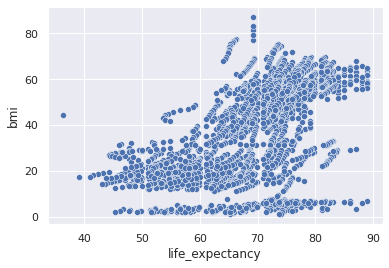

In [25]:
sns.scatterplot(x=life_expectancy_data['life_expectancy'],y=life_expectancy_data['bmi']);

In [26]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
life_expectancy_data['bmi']=life_expectancy_data[['bmi','life_expectancy']].apply(impute_BMI,axis=1)

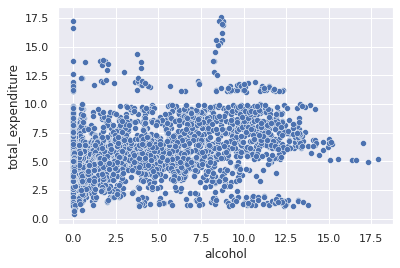

In [27]:
sns.scatterplot(y=life_expectancy_data['total_expenditure'],x=life_expectancy_data['alcohol']);

In [28]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
life_expectancy_data['total_expenditure']=life_expectancy_data[['total_expenditure','alcohol']].apply(impute_Total_exp,axis=1) 

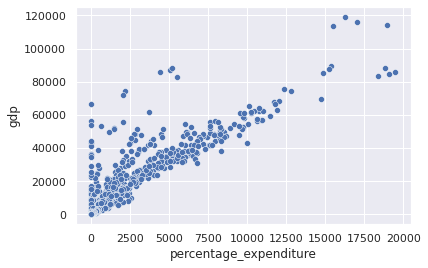

In [29]:
sns.scatterplot(x=life_expectancy_data['percentage_expenditure'],y=life_expectancy_data['gdp']);

In [30]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
life_expectancy_data['gdp']=life_expectancy_data[['gdp','percentage_expenditure']].apply(impute_GDP,axis=1)

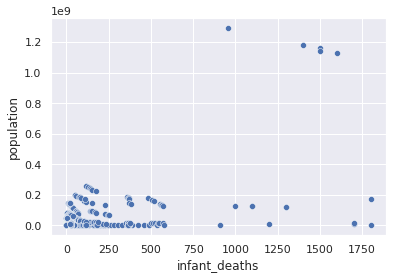

In [31]:
sns.scatterplot(x=life_expectancy_data['infant_deaths'],y=life_expectancy_data['population']);

In [32]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
life_expectancy_data['population']=life_expectancy_data[['population','infant_deaths']].apply(impute_population,axis=1)

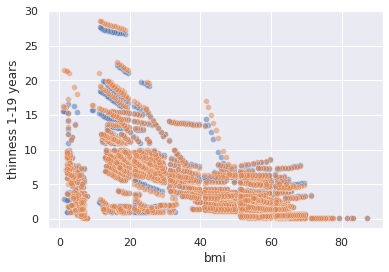

In [33]:
sns.scatterplot(x=life_expectancy_data['bmi'],y=life_expectancy_data['thinness 1-19 years'],alpha=0.5,palette="red");
sns.scatterplot(x=life_expectancy_data['bmi'],y=life_expectancy_data['thinness 5-9 years'],alpha=0.5,palette="blue");

In [34]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
life_expectancy_data['thinness 1-19 years']=life_expectancy_data[['thinness 1-19 years','bmi']].apply(impute_Thin_1,axis=1)
life_expectancy_data['thinness 5-9 years']=life_expectancy_data[['thinness 5-9 years','bmi']].apply(impute_Thin_1,axis=1)

In [35]:
life_expectancy_data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                              0
percentage_expenditure               0
hepatitis_b                          0
measles                              0
bmi                                  0
under_five_deaths                    0
polio                                0
total_expenditure                    0
diphtheria                           0
hiv/aids                             0
gdp                                  0
population                           0
thinness 1-19 years                  0
thinness 5-9 years                   0
income_composition_of_resources    167
schooling                          163
dtype: int64

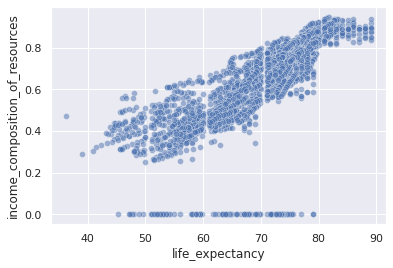

In [36]:
sns.scatterplot(x=life_expectancy_data['life_expectancy'],y=life_expectancy_data['income_composition_of_resources'],alpha=0.5);


In [37]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
life_expectancy_data['income_composition_of_resources']=life_expectancy_data[['income_composition_of_resources','life_expectancy']].apply(impute_Income,axis=1)  

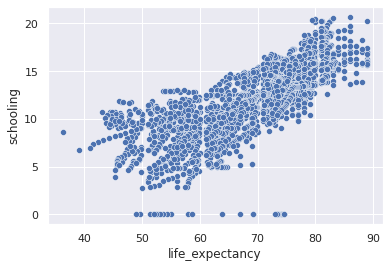

In [38]:
sns.scatterplot(x=life_expectancy_data['life_expectancy'],y=life_expectancy_data['schooling']);

In [39]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
life_expectancy_data['schooling']=life_expectancy_data[['schooling','life_expectancy']].apply(impute_schooling,axis=1)

In [40]:
print("There is no null values in our data!")
life_expectancy_data.isnull().sum()

There is no null values in our data!


country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

# Outliers

In [43]:
cont_vars = list(life_expectancy_data.columns)[3:]

In [44]:
def outlier_count(col, data=life_expectancy_data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [46]:
print("with Tukey's method")
for col in cont_vars:
    outlier_count(col)

with Tukey's method
---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------infant_deaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.72%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 291
Percent of data that is outlier: 9.9%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------bmi---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under_five_deaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------polio---------

In [47]:
life_expectancy_data.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [51]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(life_expectancy_data[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(life_expectancy_data[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

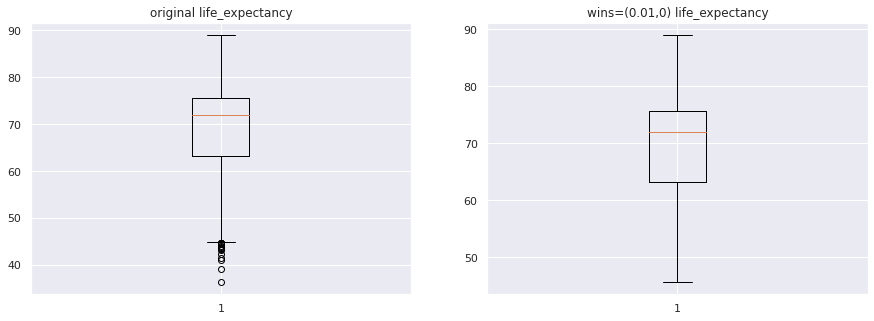

In [52]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)
test_wins(cont_vars[18], lower_limit=.05, show_plot=False)


The plot above is an example of how the winsorization is visually inspected.

# Visualization

In [53]:
wins_df = life_expectancy_data.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

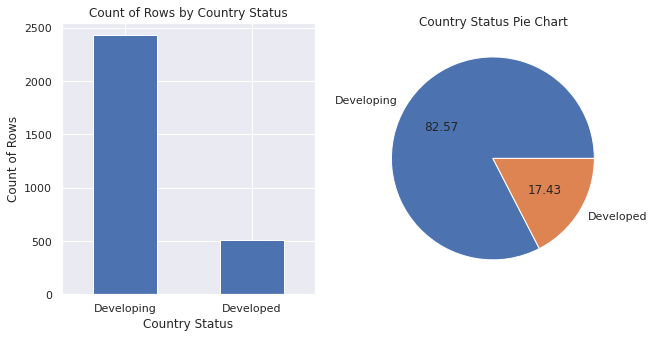

In [54]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
wins_df.status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
wins_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

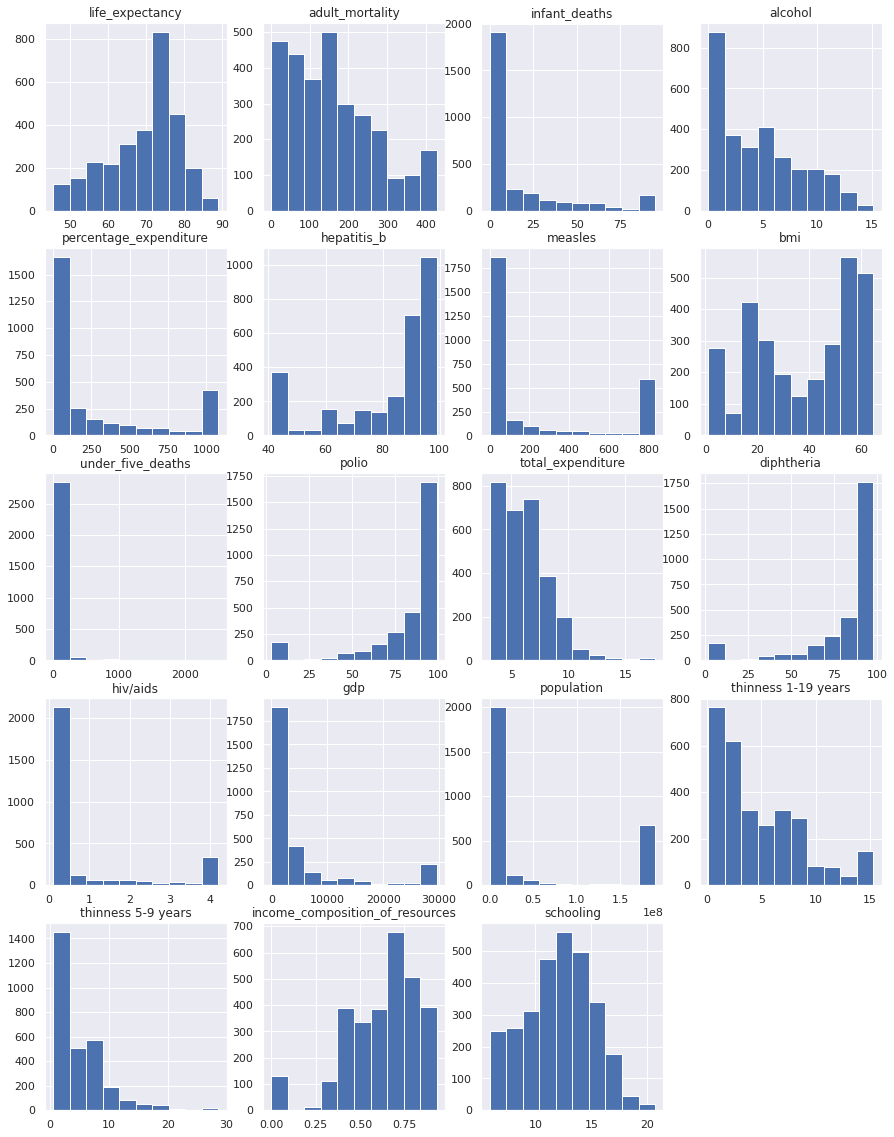

In [55]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

In [56]:
wins_df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income_composition_of_resources,schooling
year,1.000000,0.168949,-0.063473,-0.053808,-0.048471,0.032807,0.185123,-0.118772,0.102428,-0.042937,0.092918,0.092602,0.132746,-0.097194,0.079091,0.019164,-0.049754,-0.050998,0.237788,0.198064
life_expectancy,0.168949,1.000000,-0.687838,-0.510789,0.393766,0.488758,0.426772,-0.337427,0.573497,-0.223462,0.462357,0.239502,0.474151,-0.768240,0.488831,0.096158,-0.522212,-0.475813,0.734323,0.788700
adult_mortality,-0.063473,-0.687838,1.000000,0.337293,-0.202304,-0.325388,-0.252054,0.212931,-0.403995,0.103674,-0.286574,-0.151460,-0.286482,0.584000,-0.334918,-0.071518,0.352992,0.321870,-0.489982,-0.510598
infant_deaths,-0.053808,-0.510789,0.337293,1.000000,-0.282151,-0.317306,-0.333663,0.586081,-0.440936,0.584870,-0.333247,-0.186849,-0.322106,0.346479,-0.281797,0.057668,0.414825,0.453350,-0.387074,-0.512704
alcohol,-0.048471,0.393766,-0.202304,-0.282151,1.000000,0.386189,0.150900,-0.195656,0.330805,-0.110834,0.212528,0.327208,0.213353,-0.134499,0.357680,-0.038578,-0.437566,-0.408787,0.440644,0.548942
percentage_expenditure,0.032807,0.488758,-0.325388,-0.317306,0.386189,1.000000,0.168998,-0.194687,0.337336,-0.148980,0.215344,0.198296,0.210022,-0.248920,0.801552,-0.122596,-0.335371,-0.319363,0.490322,0.536103
hepatitis_b,0.185123,0.426772,-0.252054,-0.333663,0.150900,0.168998,1.000000,-0.301792,0.279084,-0.262751,0.585490,0.124475,0.653479,-0.347262,0.154187,0.113512,-0.215350,-0.221487,0.338855,0.398440
measles,-0.118772,-0.337427,0.212931,0.586081,-0.195656,-0.194687,-0.301792,1.000000,-0.317804,0.350727,-0.266235,-0.168930,-0.254989,0.214628,-0.147609,0.015162,0.362379,0.376453,-0.232367,-0.350572
bmi,0.102428,0.573497,-0.403995,-0.440936,0.330805,0.337336,0.279084,-0.317804,1.000000,-0.239154,0.291840,0.257144,0.288103,-0.444585,0.326428,0.058475,-0.556446,-0.538266,0.514800,0.575260
under_five_deaths,-0.042937,-0.223462,0.103674,0.584870,-0.110834,-0.148980,-0.262751,0.350727,-0.239154,1.000000,-0.188928,-0.142197,-0.195524,0.127147,-0.127151,0.068278,0.324129,0.472554,-0.177370,-0.239803


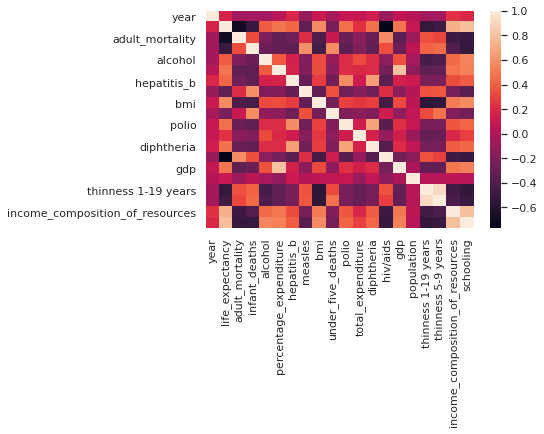

In [57]:
sns.heatmap(wins_df.corr())

### T-TESTS

There definitely appears to be a correlation, but are the differences between the years significant enough to be considered different? A t-test comparison will be used to find out.

In [58]:
years = list(wins_df.year.unique())
years.sort()
yearly_le = {}
for year in years:
    year_data = wins_df[wins_df.year == year].life_expectancy
    yearly_le[year] = year_data

In [59]:
for year in years[:-1]:
    print(10*'-' + str(year) + ' to ' + str(year+1) + 10*'-')
    print(stats.ttest_ind(yearly_le[year], yearly_le[year+1], equal_var=False))

----------2000 to 2001----------
Ttest_indResult(statistic=-0.339874273786677, pvalue=0.734147249286317)
----------2001 to 2002----------
Ttest_indResult(statistic=-0.18288775743069652, pvalue=0.8549879128960569)
----------2002 to 2003----------
Ttest_indResult(statistic=-0.09788073999943862, pvalue=0.922080868750695)
----------2003 to 2004----------
Ttest_indResult(statistic=-0.20076791323205204, pvalue=0.8409921852108724)
----------2004 to 2005----------
Ttest_indResult(statistic=-0.5360239830703207, pvalue=0.5922696887371386)
----------2005 to 2006----------
Ttest_indResult(statistic=-0.43512464639644277, pvalue=0.6637298353979988)
----------2006 to 2007----------
Ttest_indResult(statistic=-0.35499521065847695, pvalue=0.7227988446996725)
----------2007 to 2008----------
Ttest_indResult(statistic=-0.39657900568183463, pvalue=0.6919107746155075)
----------2008 to 2009----------
Ttest_indResult(statistic=-0.5367008466564068, pvalue=0.5918023223783457)
----------2009 to 2010----------
T

Based on t-tests, year to year the differences between Life Expectancy do not appear to be significant because of p values are high.

In [60]:
developed_le = wins_df[wins_df.status == 'Developed'].life_expectancy
developing_le = wins_df[wins_df.status == 'Developing'].life_expectancy
stats.ttest_ind(developed_le, developing_le, equal_var=False)

Ttest_indResult(statistic=48.00543189803656, pvalue=2e-323)

In [61]:
feat_df = wins_df.join(pd.get_dummies(wins_df.status)).drop(columns='status').copy()

In [62]:
feat_df.drop(columns=['country', 'year'], inplace=True)

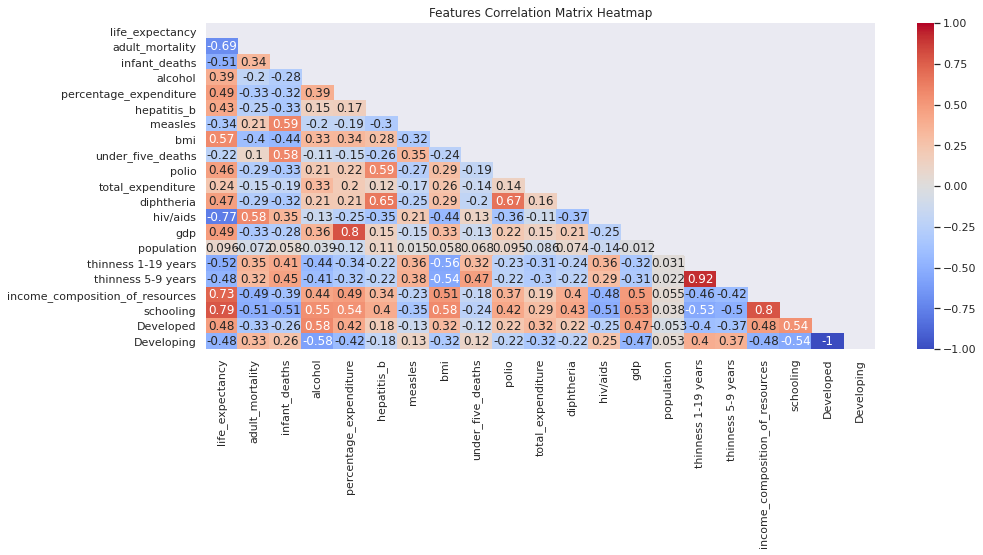

In [63]:
def feat_heatmap():
    mask = np.triu(feat_df.corr())
    plt.figure(figsize=(15,6))
    sns.heatmap(feat_df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(feat_df.columns), 0)
    plt.title('Features Correlation Matrix Heatmap')
    plt.show()
feat_heatmap()

The following are very/extremely highly correlated (correlation > .7 or correlation < -.7):

In [64]:
feat_df.drop(columns=['infant_deaths', 'population', 'percentage_expenditure','polio','thinness 1-19 years','schooling','Developing'], inplace=True)

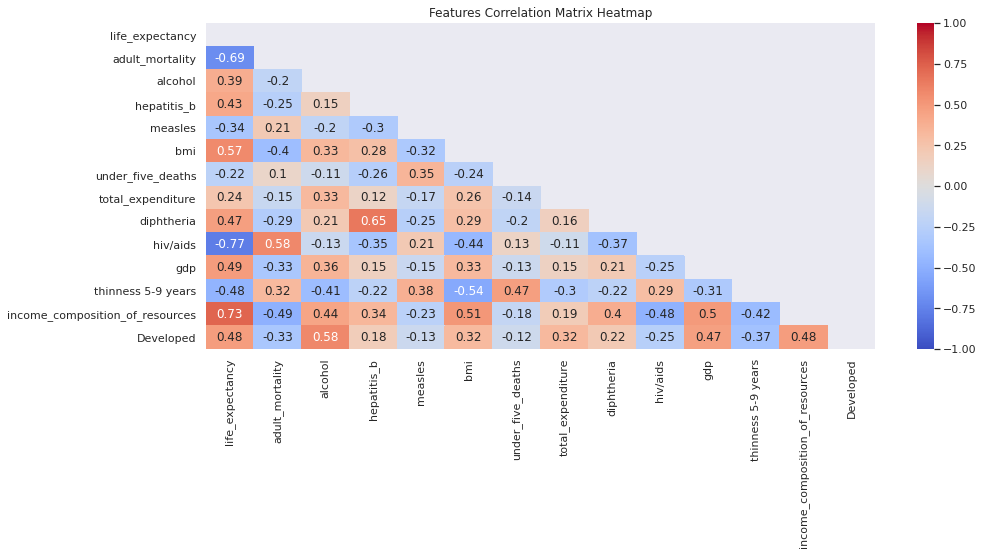

In [65]:
feat_heatmap()

## PCA

In [66]:
pca_df = feat_df.drop(columns='Developed').copy()

PCA is an unsupervised technique so the target variable is not needed and can be dropped.

In [67]:
pca_df.drop(columns='life_expectancy', inplace=True)

In [68]:
X = scale(pca_df)
sklearn_pca = PCA()
Y = sklearn_pca.fit_transform(X)
print('Explained variance by Principal Components:', sklearn_pca.explained_variance_ratio_)
print('Eigenvalues:', sklearn_pca.explained_variance_)

Explained variance by Principal Components: [0.35597838 0.11197225 0.10814811 0.08237564 0.06934266 0.0553383
 0.05135211 0.04391951 0.03373036 0.03115783 0.02918505 0.02749979]
Eigenvalues: [4.27319507 1.3441245  1.29821924 0.98884429 0.83239524 0.66428565
 0.61643513 0.52721354 0.40490214 0.37402132 0.35033987 0.3301098 ]


In [69]:
len(pca_df.columns)

12

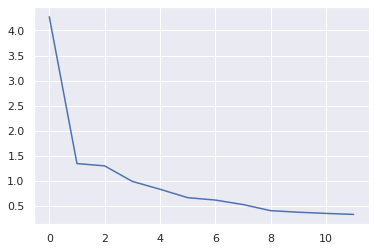

PC1 Explained Variance: 35.6%


In [70]:
plt.plot(sklearn_pca.explained_variance_)
plt.show()
print('PC1 Explained Variance:', str(round(sklearn_pca.explained_variance_ratio_[0]*100, 2))+'%')

Based on the scree plot above, it would suggest that only PC1 be kept, this is likely not a great idea as PC1 only accounts for 35.6% of the total variance of the variables. 

All of the above variables contain a seemingly meaningful correlation to the target variable (Life Expectancy) while also not being overly correlated with one another.

# Making Prediction

In [71]:
y=wins_df['life_expectancy']

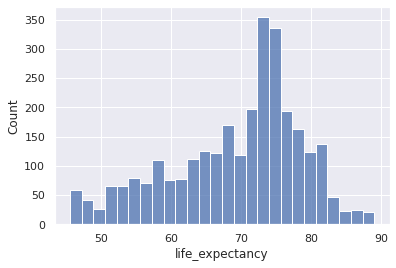

In [72]:
sns.histplot(y);

It almost have a normal distribution with negative skew.

In [73]:
X=wins_df.drop('life_expectancy',axis=1)

In [74]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   adult_mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2938 non-null   float64
 8   measles                          2938 non-null   int64  
 9   bmi                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  polio                            2938 non-null   float64
 12  total_expenditure   

Object values are not acceptable for making prediction. So we should use drop or get dummy methods for them.

In [75]:
print(X['status'].unique())
X['country'].unique()

['Developing' 'Developed']


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [76]:
status_dummy=pd.get_dummies(X['status'],drop_first=True)
X.drop(['country','status'],inplace=True,axis=1)
X=pd.concat([X,status_dummy],axis=1)

In [77]:
X.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income_composition_of_resources,schooling,Developing
0,2015,263.0,62,0.01,71.279624,65.0,831,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.3,17.3,0.479,10.1,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,15.3,17.5,0.476,10.0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.3,17.7,0.470,9.9,1
3,2012,272.0,69,0.01,78.184215,67.0,831,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.3,18.0,0.463,9.8,1
4,2011,275.0,71,0.01,7.097109,68.0,831,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.3,18.2,0.454,9.5,1


In [78]:
status_dummy=pd.get_dummies(wins_df['status'],drop_first=True)
wins_df.drop(['country','status'],inplace=True,axis=1)
wins_df=pd.concat([wins_df,status_dummy],axis=1)

In [79]:
wins_df.shape

(2938, 21)

## Test/Train

In [80]:
X.shape

(2938, 20)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))
y_train = np.reshape(y_train , (2350, ))
y_test = np.reshape(y_test , (588 , ))
X_train.shape , X_test.shape , y_train.shape , y_test.shape

The number of observations in training set is 2350
The number of observations in test set is 588


((2350, 20), (588, 20), (2350,), (588,))

#  Linear Regression 

In [82]:
from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
predictions1=Linear_model.predict(X_test)

In [84]:
predictions1[0:10]

array([78.7178741 , 51.73498362, 73.26022141, 79.08086236, 57.0789298 ,
       57.1936915 , 62.91170014, 80.81335775, 70.71073721, 63.92109863])

Predictions look good but we do need some metrics to evaluate our model. In this Regression tasks nothing better than using RMSE.

In [85]:
from sklearn.metrics import mean_squared_error
print('RMSE:',mean_squared_error(y_test,predictions1)**(0.5))

RMSE: 3.472195588195199


In [86]:
from sklearn.metrics import r2_score
print("R-squared value:")
r2_score(y_test,predictions1)


R-squared value:


0.8609926972913813

R-squared value is Very high score. Now lets see how it works if we use Ridge and Lasso Regression models.


**Ridge and Lasso**

In [87]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=2.17276e-18): result may not be accurate.



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
predictions2=ridge_model.predict(X_test)
print(mean_squared_error(y_test,predictions2)**(0.5))

3.473724283921397


In [89]:
lasso_model=Lasso(alpha=0.00000001)

In [90]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
predictions3=lasso_model.predict(X_test)
print(mean_squared_error(y_test,predictions3)**(0.5))

3.472195594433496


We can see Lasso almost all reached Linear regression model by using alpha=0.00000001 that means using Linear Regression is almost all ok.

In [92]:
print("b0: ", Linear_model.intercept_)
print("b1,b2: ", Linear_model.coef_)

b0:  -45.048339722990676
b1,b2:  [ 5.21681906e-02 -1.44409310e-02 -2.59972365e-02  1.54929627e-02
  1.14903881e-03  3.80865434e-03 -2.19248827e-04  4.35265872e-03
  1.10995166e-03  1.42974207e-02  7.56529035e-03  1.78353449e-02
 -2.59478712e+00  3.45905663e-05  2.57479907e-09 -5.01151419e-02
 -6.33158296e-02  5.62365592e+00  7.25023087e-01 -1.27264275e+00]


In [93]:
!pip install statsmodels

# Random Search Cross-Validation RF


In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [95]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [96]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 7 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [97]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 156}

In [98]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()   # n_estimators = 10
base_model.fit( X_test,y_test)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.6375 degrees.
Accuracy = 99.03%.
Model Performance
Average Error: 1.0805 degrees.
Accuracy = 98.37%.
Improvement of -0.66%.


In [107]:
from sklearn.metrics import r2_score
print("R-squared Score Obtained for Random forest predicting Life Expectancy is {0}".format(r2_score(y_test, best_random.predict(X_test))))


R-squared Score Obtained for Random forest predicting Life Expectancy is 0.9662520442972173


It seems like our base-line model is performing better than our random search CV tuned model. That simply means Hyper-tuning is not required but let's do it anyway.

# GridSearch

In [99]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [100]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1043 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2015 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2622 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 3311 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 4080 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 4931 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 30.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [101]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [102]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

{'bootstrap': False, 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Model Performance
Average Error: 1.0404 degrees.
Accuracy = 98.43%.
Improvement of -0.60%.


**Grid search has more accuracy than random search.**

In [103]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - y_test

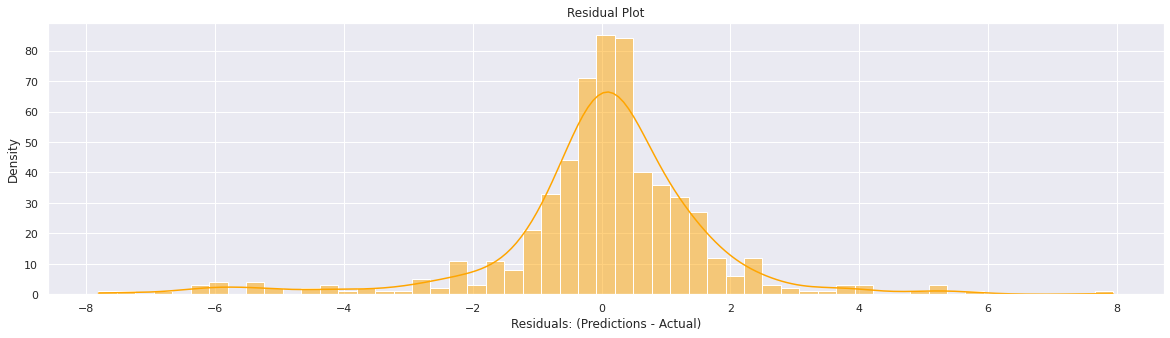

In [104]:
plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

Residuals is the difference between the predictions from model and actual of Test data. Ideally the distribution of these residuals should be normal with mean centered at zero. In our case, it is almost normal and mean is almost centered at 0. Which indicates our model is highly efficient.

In [105]:
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(y_test, model_predictions)))

R-squared Score Obtained for predicting Life Expectancy is 0.9682471391507864


**Grid search R-squared value is 0.97. that is so good result. The value is more than random search R2 value.**

# SVM

# Decision Tree for regression

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [110]:
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [111]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("Decision tree RMSE value : {:.2f}".format(rmse_ka))

Decision tree RMSE value : 3.23


In [113]:
print("R-squared Score Obtained for Decision tree predicting Life Expectancy is {0}".format(r2_score(y_test, dt_reg.predict(X_test))))

R-squared Score Obtained for Decision tree predicting Life Expectancy is 0.879798684309029


**Value of R2 of decisiton tree is the lowest value of three predictions. 0.88**

#KNN regression

In [115]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors

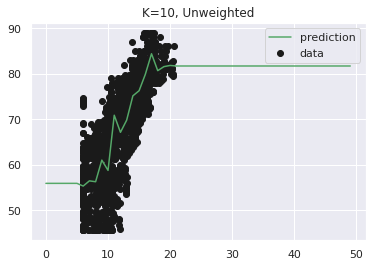

In [148]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X_knn = pd.DataFrame(X_train.schooling)
Y_knn = y_train
knn.fit(X_knn, Y_knn)

# Set up our prediction line.
T = np.arange(0, 50, 1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X_knn, Y_knn, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()


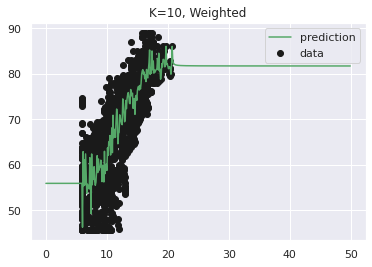

In [149]:
#KNN with weight
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X_knn, Y_knn)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_w = knn_w.predict(T)

plt.scatter(X_knn, Y_knn, c='k', label='data')
plt.plot(T, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [150]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_knn, Y_knn, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_knn, Y_knn, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.62 (+/- 0.04)
Weighted Accuracy: 0.62 (+/- 0.03)


**The result is really good and it shows that there is relationship.**



# Boosting

In [151]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=111)

In [152]:
xg_reg.fit(X_train,y_train)
y_predict_xg = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_xg))
print("RMSE: %f" % (rmse))

RMSE: 2.227896


In [154]:
print("R-squared Score Obtained for XGBoost predicting Life Expectancy is {0}".format(r2_score(y_test, y_predict_xg)))

R-squared Score Obtained for XGBoost predicting Life Expectancy is 0.9427706245864304


In [156]:
# XGBoost with linear
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [157]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 4.968520


Comparing the Root Mean Square Errors (RMSE) of the two models, it turns out that model with decision trees as a weak learning algorithm outperforms the other models.

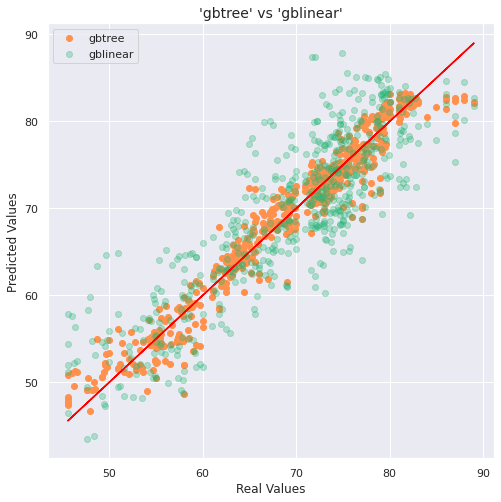

In [158]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' vs 'gblinear'", size = 14)
ax1 = plt.scatter(y_test, y_predict_xg, color = '#FF914D')
ax2 = plt.scatter(y_test, y_predict_gblinear, color='#22B573', alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

GBLinear has more good results than gbtree because of value that have closer the line.

**Cross validation with XGBoost**

In [159]:
life_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":4}
life_cv = xgb.cv(dtrain=life_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=111)
display(life_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
12,8.408217,0.112396,9.585150,0.269640
11,8.519538,0.112038,9.605577,0.273830
10,8.668900,0.102379,9.627397,0.247939
9,8.854226,0.103028,9.714700,0.220532
8,9.175020,0.101319,9.906947,0.187909


In [160]:
life_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":4}
life_cv = xgb.cv(dtrain=life_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="mae", as_pandas=True, seed=123)
display(life_cv.sort_values(by='test-mae-mean').head(5))

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
16,6.601715,0.054114,7.821130,0.118959
14,6.768099,0.043529,7.833647,0.099636
15,6.673259,0.047931,7.842893,0.112165
13,6.860876,0.043163,7.857847,0.099403
12,6.982993,0.033798,7.886557,0.105723


In [161]:
life_dmatrix = xgb.DMatrix(data=X, label=y)
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=life_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=111)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [162]:
print("Best 11 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(best_values.sort_values('rmse').head())

Best 11 values:


,l1,rmse
18,0.19,9.526452
17,0.18,9.526461
16,0.17,9.526472
15,0.16,9.526481
14,0.15,9.526492


Our model produces the most accurate result when alpha is 0.19. We can apply the same method for other parameters (gamma and lambda)

# Light GBM

In [169]:
pip install lightgbm


In [170]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

In [171]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [172]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict_lgb = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_predict_lgb))
print("RMSE: %f" % (rmse))

RMSE: 1.874110


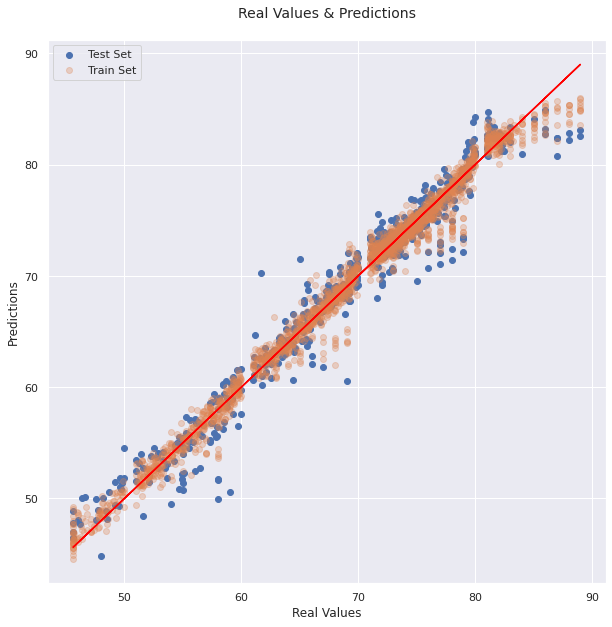

In [173]:
plt.figure(figsize=(10,10))
plt.title('Real Values & Predictions\n', size = 14)
ax1 = plt.scatter(y_test, y_predict_lgb)
ax2 = plt.scatter(y_train, y_predict_train,alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Set', 'Train Set'))
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

# R-Squared Comparision

In [287]:
XGBOOST_life_r2=r2_score(y_test, y_predict_xg)
LBGM_life_r2=r2_score(y_test,lgb_reg_model.predict(X_test))
Decision_tree_life_r2=r2_score(y_test, dt_reg.predict(X_test))
Grid_Search_life_r2=r2_score(y_test, model_predictions)
Random_forest_life_r2 =r2_score(y_test, best_random.predict(X_test))
Linear_Regression_life_r2 =r2_score(y_test,predictions1)
Ridge_life_r2 =r2_score(y_test,predictions2)
Lasso_life_r2 =r2_score(y_test,predictions3)

In [288]:
r2_list=[XGBOOST_life_r2,Decision_tree_life_r2,Grid_Search_life_r2,Random_forest_life_r2,Ridge_life_r2,Lasso_life_r2 ]

In [289]:
r2_df=pd.DataFrame([r2_list],columns=["XGBOOST","Decision_tree","Grid_Search","Random_forest","Ridge","Lasso"])

In [290]:
r2_df=r2_df.rename(index={0:"R2"})

In [291]:
r2_df

,XGBOOST,Decision_tree,Grid_Search,Random_forest,Ridge,Lasso
R2,0.942771,0.879799,0.968247,0.966252,0.86087,0.860993


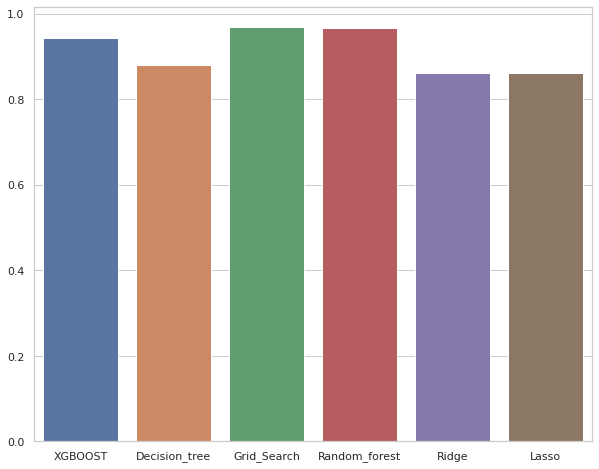

In [292]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(data=r2_df)

**Highest R2 value is Grid search result= 0.968247**